In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aloo0pp3wpxrpx5fr5gt/Phone_Sales_Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('/kaggle/input/aloo0pp3wpxrpx5fr5gt/Phone_Sales_Dataset.csv')


In [4]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   os              1027 non-null   object 
 2   popularity      1224 non-null   int64  
 3   best_price      1224 non-null   int64  
 4   lowest_price    964 non-null    float64
 5   highest_price   964 non-null    float64
 6   sellers_amount  1224 non-null   int64  
 7   screen_size     1222 non-null   float64
 8   memory_size     1112 non-null   float64
 9   battery_size    1214 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 95.8+ KB


In [6]:
pd.set_option('display.max.rows',225)

In [9]:
df=df.loc[~df.duplicated(subset=['Brand_Name','Memory_Size'])] \
    .reset_index(drop=True).copy()
df

,Brand_Name,Operating_System,Popularity,Best_price,Lowest_Price,Highest_Price,Sellers_Amount,Screen_Size,Memory_Size,Battery_Size
0,ALCATEL,Android,422,1690,1529.0,1819.0,36,5.00,8.0000,2000.0
1,ALCATEL,Android,323,1803,1659.0,2489.0,36,5.00,16.0000,2000.0
2,Nokia,Android,1047,1999,NaN,NaN,10,5.71,16.0000,3000.0
3,Honor,Android,71,10865,10631.0,11099.0,2,5.80,64.0000,3400.0
4,Honor,Android,424,3999,NaN,NaN,2,6.21,32.0000,3400.0
5,Honor,Android,477,5100,4990.0,5222.0,3,6.21,128.0000,3400.0
6,Nokia,NaN,18,583,528.0,649.0,28,1.77,0.0040,800.0
7,Nokia,NaN,262,601,539.0,703.0,31,1.77,NaN,800.0
8,Meizu,Android,490,6584,NaN,NaN,1,5.45,128.0000,3000.0
9,Meizu,Android,166,5272,4970.0,5448.0,3,5.45,64.0000,3000.0


In [8]:
df=df.rename(columns={'brand_name': 'Brand_Name', 'os': 'Operating_System', 'popularity': 'Popularity', 'best_price': 'Best_price', 'lowest_price': 'Lowest_Price',
                   'highest_price': 'Highest_Price', 'sellers_amount': 'Sellers_Amount', 'screen_size': 'Screen_Size', 'memory_size': 'Memory_Size',
                   'battery_size': 'Battery_Size'})

In [10]:
df['Highest_Price']=df['Highest_Price'].fillna(df['Highest_Price'].mean(), inplace=False)
df['Lowest_Price']=df['Lowest_Price'].fillna(df['Lowest_Price'].mean(), inplace=False)
df['Screen_Size']=df['Screen_Size'].fillna(df['Screen_Size'].mean(), inplace=False)
df['Battery_Size']=df['Battery_Size'].fillna(df['Battery_Size'].mean(), inplace=False)
df['Memory_Size']=df['Memory_Size'].fillna(df['Memory_Size'].mode()[0], inplace=False)
df['Operating_System']=df['Operating_System'].fillna(df['Operating_System'].mode()[0], inplace=False)
df

,Brand_Name,Operating_System,Popularity,Best_price,Lowest_Price,Highest_Price,Sellers_Amount,Screen_Size,Memory_Size,Battery_Size
0,ALCATEL,Android,422,1690,1529.000000,1819.000000,36,5.000000,8.0000,2000.00000
1,ALCATEL,Android,323,1803,1659.000000,2489.000000,36,5.000000,16.0000,2000.00000
2,Nokia,Android,1047,1999,6523.100671,8093.214765,10,5.710000,16.0000,3000.00000
3,Honor,Android,71,10865,10631.000000,11099.000000,2,5.800000,64.0000,3400.00000
4,Honor,Android,424,3999,6523.100671,8093.214765,2,6.210000,32.0000,3400.00000
5,Honor,Android,477,5100,4990.000000,5222.000000,3,6.210000,128.0000,3400.00000
6,Nokia,Android,18,583,528.000000,649.000000,28,1.770000,0.0040,800.00000
7,Nokia,Android,262,601,539.000000,703.000000,31,1.770000,64.0000,800.00000
8,Meizu,Android,490,6584,6523.100671,8093.214765,1,5.450000,128.0000,3000.00000
9,Meizu,Android,166,5272,4970.000000,5448.000000,3,5.450000,64.0000,3000.00000


In [11]:
df.isna().sum()

Brand_Name          0
Operating_System    0
Popularity          0
Best_price          0
Lowest_Price        0
Highest_Price       0
Sellers_Amount      0
Screen_Size         0
Memory_Size         0
Battery_Size        0
dtype: int64

In [12]:
top10_battery_sizes=df['Brand_Name'].value_counts().reset_index().head(10)
top10_battery_sizes

,Brand_Name,count
0,Sigma mobile,9
1,Nokia,8
2,Apple,7
3,Samsung,7
4,Ulefone,7
5,Blackview,6
6,HUAWEI,6
7,Tecno,6
8,ALCATEL,6
9,OPPO,5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sigma mobile'),
  Text(1, 0, 'Nokia'),
  Text(2, 0, 'Apple'),
  Text(3, 0, 'Samsung'),
  Text(4, 0, 'Ulefone'),
  Text(5, 0, 'Blackview'),
  Text(6, 0, 'HUAWEI'),
  Text(7, 0, 'Tecno'),
  Text(8, 0, 'ALCATEL'),
  Text(9, 0, 'OPPO')])

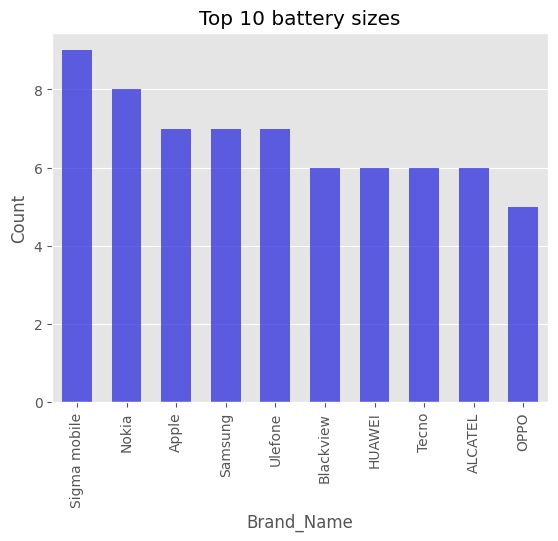

In [13]:
sns.barplot(data=top10_battery_sizes, x='Brand_Name',y='count',alpha=0.7,width=0.6,color='blue')
plt.ylabel('Count')
plt.xlabel('Brand_Name')
plt.title('Top 10 battery sizes')
plt.xticks(rotation = 90)

In [ ]:
df.to_csv('mobil_data.csv')

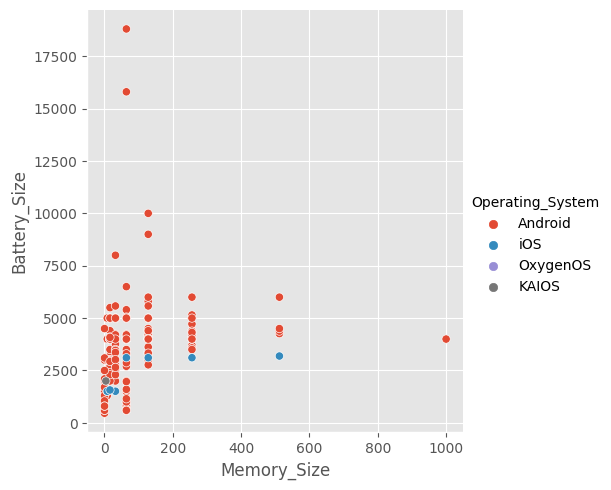

In [14]:
sns.relplot(data=df, x='Memory_Size', y='Battery_Size', hue='Operating_System')